<a href="https://colab.research.google.com/github/Charee-Villapong/charee-villapong/blob/master/sales_contract_lead_time_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv("/content/drive/MyDrive/data - シート2.csv")
df.columns

Index(['商談 所有者', 'Unnamed: 1', '取引先名', 'クローズ日', 'フェーズ', '契約コース',
       '初回面談から契約締結までの日数'],
      dtype='object')

In [32]:
df = df[[ '契約コース',
       '初回面談から契約締結までの日数']]

In [33]:
df.head()

,契約コース,初回面談から契約締結までの日数
0,エキスパート: 24w,0.0
1,エキスパート: 24w,6.0
2,エキスパート: 24w,0.0
3,エキスパート: 24w,127.0
4,エキスパート: 24w,14.0


In [34]:
df.isnull().sum()

契約コース              4
初回面談から契約締結までの日数    1
dtype: int64

In [35]:
df.dropna(how="any",axis=0,inplace=True)
df.isnull().sum()

契約コース              0
初回面談から契約締結までの日数    0
dtype: int64

In [36]:
df.tail()

,契約コース,初回面談から契約締結までの日数
228,フリーランス: 48w,3.0
229,フリーランス: 48w,16.0
230,フリーランス: 48w,5.0
231,フリーランス: 48w,22.0
232,フリーランス: 48w,5.0


In [37]:
df_mean = df.groupby("契約コース").mean()
df_mean

,初回面談から契約締結までの日数
契約コース,
エキスパート: 24w,10.877660
エキスパート: 48w,11.275862
フリーランス: 48w,6.312500


In [38]:
df = df.set_index("契約コース")

In [39]:
df.head()

,初回面談から契約締結までの日数
契約コース,
エキスパート: 24w,0.0
エキスパート: 24w,6.0
エキスパート: 24w,0.0
エキスパート: 24w,127.0
エキスパート: 24w,14.0


In [51]:
df_ex24 = df.loc["エキスパート: 24w","初回面談から契約締結までの日数"]
df_ex48 = df.loc["エキスパート: 48w","初回面談から契約締結までの日数"]
df_fr48 = df.loc[ 'フリーランス: 48w',"初回面談から契約締結までの日数"]

In [50]:
df.index.unique()

Index(['エキスパート: 24w', 'エキスパート: 48w', 'フリーランス: 48w'], dtype='object', name='契約コース')

In [63]:
x1 = df_ex24.values
x2 = df_ex48.values
x3 = df_fr48.values

In [92]:
y1,y2,y3 = ['ex: 24w', 'ex: 48w', 'fr: 48w']
data = (x1,x2,x3)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


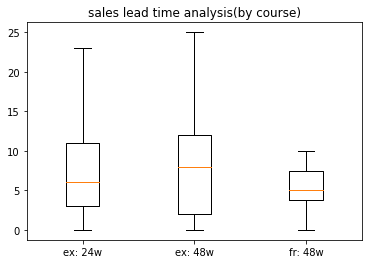

In [111]:
#plt.set_title("コース毎のリードタイム分析")
fig1, ax1 = plt.subplots()
ax1.set_title("sales lead time analysis(by course)")
ax1.boxplot(data, labels=[y1,y2,y3],sym="")
fig1.savefig("analysis.png")